In [1]:
# Imports
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Initialize variables
header = ['portfolio', 'mw', 'fuelcost', 'varom', 'fixom', 'capcost', 'marginprice', 'plant']
result = []
colors = []
x_axis = [0]

In [3]:
# MAIN
with open('power_plants.csv') as raw:
    temp = []
    data = csv.reader(raw)
    next(data) # Skips header row
    for datum in data:
        max_cost = float(datum[6])+(float(datum[5])*float(datum[3]))+(float(datum[4])*float(datum[3]))
        margin_price = '{0:.2f}'.format(round(max_cost/float(datum[3]),2))
        temp.append([datum[0], datum[3], datum[4], datum[5], datum[6], max_cost, margin_price, datum[1]])
    result = sorted(temp, key=lambda x: float(x[6]) ) 

for plant in result:
    if plant[0] == 'Big_Coal':
        colors.append('r')
        if plant != result[-1]:
            print(plant, result[result.index(plant) + 1])
    else:
        colors.append('b')

for plant in result:
    if plant == result[-1]: break
    if len(x_axis) == 0:
        x_axis.append(int(plant[1]))
    else:
        x_axis.append(int(plant[1]) + x_axis[-1])

['Big_Coal', '1900', '17.5', '1.5', '2000', 38100.0, '20.05', 'FOUR_CORNERS'] ['Old_Timers', '750', '15', '4.5', '3750', 18375.0, '24.50', 'MOHAVE_1']
['Big_Coal', '300', '27', '1.5', '500', 9050.0, '30.17', 'HUNTINGTON_BEACH_1-2'] ['Beachfront', '650', '29', '0.5', '500', 19675.0, '30.27', 'COOLWATER']
['Big_Coal', '950', '28', '1.5', '1250', 29275.0, '30.82', 'REDONDO_7-8'] ['Big_Gas', '700', '30', '0.5', '500', 21850.0, '31.21', 'SOUTH_BAY']
['Big_Coal', '350', '28', '1.5', '750', 11075.0, '31.64', 'REDONDO_5-6'] ['Big_Gas', '400', '30', '1.5', '250', 12850.0, '32.12', 'EL_SEGUNDO_1-2']
['Big_Coal', '150', '45', '1.5', '500', 7475.0, '49.83', 'HUNTINGTON_BEACH_5'] ['Big_Coal', '250', '50', '1.5', '0', 12875.0, '51.50', 'ALAMITOS_7']
['Big_Coal', '250', '50', '1.5', '0', 12875.0, '51.50', 'ALAMITOS_7'] ['Beachfront', '300', '52', '0.5', '0', 15750.0, '52.50', 'ELLWOOD']


In [4]:
# Outputs
print(header)
for plant in result: print(plant)

['portfolio', 'mw', 'fuelcost', 'varom', 'fixom', 'capcost', 'marginprice', 'plant']
['Old_Timers', '1000', '0', '0', '3750', 3750.0, '3.75', 'BIG_CREEK']
['Fossil_Light', '800', '0', '0.5', '3750', 4150.0, '5.19', 'HELMS']
['Fossil_Light', '1000', '7.5', '4', '5000', 16500.0, '16.50', 'DIABLO_CANYON_1']
['Big_Coal', '1900', '17.5', '1.5', '2000', 38100.0, '20.05', 'FOUR_CORNERS']
['Old_Timers', '750', '15', '4.5', '3750', 18375.0, '24.50', 'MOHAVE_1']
['Old_Timers', '750', '15', '4.5', '3750', 18375.0, '24.50', 'MOHAVE_2']
['Bay_Views', '750', '21.5', '1.5', '2000', 19250.0, '25.67', 'MOSS_LANDING_6']
['Bay_Views', '750', '21.5', '1.5', '2000', 19250.0, '25.67', 'MOSS_LANDING_7']
['East_Bay', '650', '25', '0.5', '625', 17200.0, '26.46', 'PITTSBURGH_5-6']
['Bay_Views', '665', '25', '0.5', '1000', 17957.5, '27.00', 'MORRO_BAY_3-4']
['Beachfront', '300', '26', '1.5', '250', 8500.0, '28.33', 'MANDALAY_1-2']
['Bay_Views', '335', '26.5', '0.5', '500', 9545.0, '28.49', 'MORRO_BAY_1-2']
['Bea

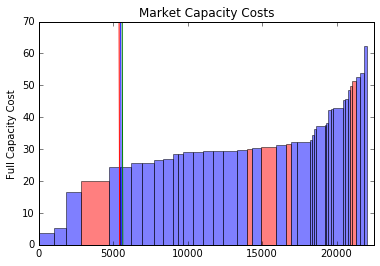

In [13]:
# Plots
fig = plt.figure()
ax = fig.gca()
ax.set_ylim(0, 70)
ax.set_xlim(0, 22500)

y_axis = [float(plant[6]) for plant in result]
x = range(6000)
y1 = []
y2 = []
y3 = []

for i in x:
    y = (-2 * i + (4020 + 7035))
    y1.append(y)
        
for i in x:
    y = (-2 * i + (4020 + 7035 * 1.03))
    y2.append(y)

for i in x:
    y = (-2 * i + (4020 + 7035 * .97))
    y3.append(y)

ax.bar(x_axis, y_axis, width=[int(plant[1]) for plant in result], color=colors, alpha=0.5)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)

plt.ylabel('Full Capacity Cost')
plt.title('Market Capacity Costs')
 
plt.show()